# Beginning with ACAS Xu

In [13]:
import parse
import analyse
import matplotlib.pyplot as plt
import numpy as np

In [14]:
benchmarks=[
"results/ACASXU_run2a_1_2_batch_2000-retrain-1",
"results/ACASXU_run2a_1_2_batch_2000-student-1",
"results/ACASXU_run2a_1_1_batch_2000-retrain-1",
"results/ACASXU_run2a_1_1_batch_2000-student-1"
]
properties=[
    500,
    50,
    5,
    0.5,
    0.05,
    0.005
]
commit = '3ad4254'
commit_buening = '04f3bfb'
out_handlers=[parse.CegarOptimal]
err_handlers=[parse.RunLim]
both_handlers=[parse.NNEquivResultHandler]
both_handlers_buening=[]#parse.BueningResultHandler]
num_runs=3

In [15]:
property_sizes = {}
property_sizes_buening = {}
for v in properties:
    property_sizes[v]={}
    property_sizes_buening[v]={}
    for b in benchmarks:
        property_sizes[v][b]=[]
        property_sizes_buening[v][b]=[]
        if b == "results/ACASXU_run2a_1_2_batch_2000-student-1" and v == 0.005:
            continue
        for i in range(1,num_runs+1):
            try:
                property_sizes[v][b].append(
                    parse.BenchmarkRun(
                        "../"+b+"-"+str(v)+"-REFINE_UNTIL_LAST_OPTIMISTIC1/"+str(i)+"/nnequiv-"+commit+"/stdout.log",
                        "../"+b+"-"+str(v)+"-REFINE_UNTIL_LAST_OPTIMISTIC1/"+str(i)+"/nnequiv-"+commit+"/stderr.log",
                        out_handlers=out_handlers,
                        err_handlers=err_handlers,
                        both_handlers=both_handlers
                    )
                )
            except (FileNotFoundError,Exception):
                print(f"Count not find ../"+b+"-"+str(v)+"-REFINE_UNTIL_LAST_OPTIMISTIC1/"+str(i)+"/nnequiv-"+commit+"/stdout.log")
        for i in range(1,num_runs+1):
            try:
                property_sizes_buening[v][b].append(
                    parse.BenchmarkRun(
                        "../"+b+"-"+str(v)+"-/"+str(i)+"/buening-"+commit_buening+"/stdout.log",
                        "../"+b+"-"+str(v)+"-/"+str(i)+"/buening-"+commit_buening+"/stderr.log",
                        out_handlers=out_handlers,
                        err_handlers=err_handlers,
                        both_handlers=both_handlers_buening
                    )
                )
            except (FileNotFoundError,Exception):
                print(f"Count not find ../"+b+"-"+str(v)+"-/"+str(i)+"/buening-"+commit_buening+"/stdout.log")

In [16]:
properties_median = {}
for v in properties:
    properties_median[v]={}
    for b in benchmarks:
        properties_median[v][b]=parse.AggregateRun(property_sizes[v][b])
properties_median_buening = {}
for v in properties:
    properties_median_buening[v]={}
    for b in benchmarks:
        properties_median_buening[v][b]=parse.AggregateRun(property_sizes_buening[v][b])

In [17]:
properties_median_buening[0.005]['results/ACASXU_run2a_1_2_batch_2000-retrain-1'].get_val(['runlim','real'],strategy='A')

[10800.04, 10800.09, 10800.08]

In [20]:
benchmarks_paulsen=[
"results/ACASXU_run2a_1_2_batch_2000-trunc-1",
"results/ACASXU_run2a_1_1_batch_2000-trunc-1",
"results/ACASXU_run2a_1_2_batch_2000-retrain-1",
"results/ACASXU_run2a_1_1_batch_2000-retrain-1",
]
properties_paulsen=[
    500,
    50,
    5,
    0.5,
    0.05,
    0.005
]
out_handlers=[parse.CegarOptimal]
err_handlers=[parse.RunLim]
#both_handlers=[parse.NNEquivResultHandler]
#both_handlers_buening=[]#parse.BueningResultHandler]
num_runs=3

In [21]:
property_sizes_paulsen = {}
for v in properties:
    property_sizes_paulsen[v]={}
    for b in benchmarks_paulsen:
        property_sizes_paulsen[v][b]=[]
        if b == "results/ACASXU_run2a_1_2_batch_2000-student-1" and v == 0.005:
            continue
        for i in range(1,num_runs+1):
            try:
                property_sizes_paulsen[v][b].append(
                    parse.BenchmarkRun(
                        "../"+b+"-"+str(v)+"-paulsen/"+str(i)+"/paulsen/stdout.log",
                        "../"+b+"-"+str(v)+"-paulsen/"+str(i)+"/paulsen/stderr.log",
                        out_handlers=out_handlers,
                        err_handlers=err_handlers,
                        both_handlers=both_handlers
                    )
                )
            except (FileNotFoundError,Exception):
                print(f"Count not find ../"+b+"-"+str(v)+"-paulsen/"+str(i)+"/paulsen/stdout.log")

In [24]:
properties_median_paulsen = {}
for v in properties:
    properties_median_paulsen[v]={}
    for b in benchmarks_paulsen:
        properties_median_paulsen[v][b]=parse.AggregateRun(property_sizes_paulsen[v][b])

In [22]:
from cycler import cycler
from matplotlib.patches import Rectangle

results/ACASXU_run2a_1_2_batch_2000-retrain-1
results/ACASXU_run2a_1_2_batch_2000-student-1
results/ACASXU_run2a_1_1_batch_2000-retrain-1
results/ACASXU_run2a_1_1_batch_2000-student-1


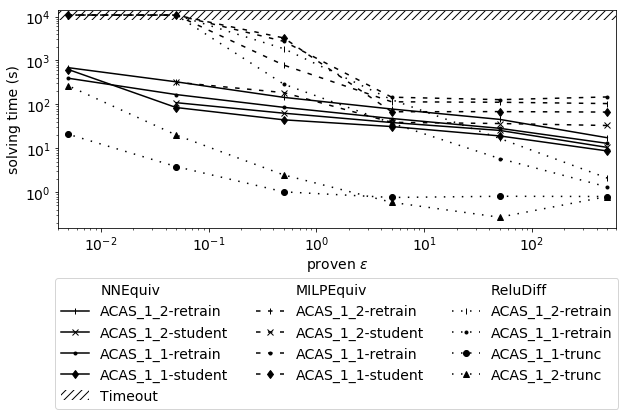

In [37]:
#'--'
dot_cycle = (cycler('marker', ['|','x','.','d']))
styles = dot_cycle()
benchmarks_labels = {
"results/ACASXU_run2a_1_2_batch_2000-retrain-1":"ACAS_1_2-retrain",
"results/ACASXU_run2a_1_2_batch_2000-student-1":"ACAS_1_2-student",
"results/ACASXU_run2a_1_1_batch_2000-retrain-1":"ACAS_1_1-retrain",
"results/ACASXU_run2a_1_1_batch_2000-student-1":"ACAS_1_1-student",
"results/mnist8x8_100_80_60_40_20_10_eps1-9000.2":"MNIST_large-epsilon",
"results/ACASXU_run2a_1_1_batch_2000-trunc-1":"ACAS_1_1-trunc",
"results/ACASXU_run2a_1_2_batch_2000-trunc-1":"ACAS_1_2-trunc"
}
width=0.3
fig, (ax) = plt.subplots()

benchmarks=[
"results/ACASXU_run2a_1_2_batch_2000-retrain-1",
"results/ACASXU_run2a_1_2_batch_2000-student-1",
"results/ACASXU_run2a_1_1_batch_2000-retrain-1",
"results/ACASXU_run2a_1_1_batch_2000-student-1"
]
properties=[
    500,
    50,
    5,
    0.5,
    0.05,
    0.005
]
plt.rcParams.update({'font.size': 14})

to_rect = ax.add_patch(Rectangle((0, 8500), 600, 5000,
             #edgecolor = 'pink',
             facecolor = 'white',
             linewidth=None,
             hatch='///',
             fill=True))
handles_nnequiv=[]
handles_buening=[]
handles_paulsen=[]

for b in benchmarks:
    print(b)
    vals = []
    props = []
    vals_buening = []
    props_buening = []
    vals_paulsen=[]
    props_paulsen=[]
    last_val = None
    for i,p in enumerate(properties):
        v = properties_median[p][b].get_val(['runlim','real'],strategy='M')
        if v is not None:
            vals.append(v)
            props.append(properties[i])
        vb = properties_median_buening[p][b].get_val(['runlim','real'],strategy='M')
        if "retrain" in b:
            vp = properties_median_paulsen[p][b].get_val(['runlim','real'],strategy='M')
        #print(properties[i])
        #print(vb)
        if vb is not None:
            vals_buening.append(vb)
            props_buening.append(properties[i])
        if vp is not None:
            vals_paulsen.append(vp)
            props_paulsen.append(vp)
    cur_style=next(styles)
    handles_nnequiv.append(ax.plot(props, vals, label=benchmarks_labels[b], color='black', linestyle='-', **cur_style)[0])
    handles_buening.append(ax.plot(props_buening, vals_buening, label=benchmarks_labels[b], color='black', linestyle=(0, (3, 5)), **cur_style)[0])
    if "retrain" in b:
        handles_paulsen.append(ax.plot(props_buening, vals_paulsen, label=benchmarks_labels[b], color='black', linestyle=(0, (1, 5)), **cur_style)[0])

dot_cycle = (cycler('marker', ['o','^']))
styles = dot_cycle()
for b in ["results/ACASXU_run2a_1_1_batch_2000-trunc-1","results/ACASXU_run2a_1_2_batch_2000-trunc-1",]:
    vals_paulsen=[]
    props_paulsen=[]
    for i,p in enumerate(properties):
        vp = properties_median_paulsen[p][b].get_val(['runlim','real'],strategy='M')
        if vp is not None:
            vals_paulsen.append(vp)
            props_paulsen.append(vp)
    handles_paulsen.append(ax.plot(props_buening, vals_paulsen, label=benchmarks_labels[b], color='black', linestyle=(0, (1, 5)), **next(styles))[0])


ax.set_xscale('log')
ax.set_yscale('log')
fig.set_figwidth(10)
fig.set_figheight(4)
plt.ylim((0,14000))
plt.xlim((0.004,600))
ax.set_ylabel('solving time (s)')
ax.set_xlabel('proven $\epsilon$')
#ax2.set_xlabel('proven $\epsilon$')
handles,labels = ax.get_legend_handles_labels()

import matplotlib.patches as mpatches
nnequiv_dummy = mpatches.Patch(color='white', label='NNEquiv')
milpequiv_dummy = mpatches.Patch(color='white', label='MILPEquiv')
paulsen_dummy = mpatches.Patch(color='white', label='ReluDiff')
empty_dummy = mpatches.Patch(color='white', label='')

#handles = [nnequiv_dummy, handles[0], handles[2], handles[4], handles[6],to_rect, milpequiv_dummy, handles[1], handles[3], handles[5], handles[7]]
#labels = ["NNEquiv", labels[0], labels[2], labels[4], labels[6], "Timeout", "MILPEquiv", labels[1], labels[3], labels[5], labels[7]]

handles = [nnequiv_dummy,
          handles_nnequiv[0],handles_nnequiv[1],handles_nnequiv[2],handles_nnequiv[3],
          to_rect,
           milpequiv_dummy,
          handles_buening[0],handles_buening[1],handles_buening[2],handles_buening[3],
          empty_dummy,
          paulsen_dummy,
          handles_paulsen[0],handles_paulsen[1],handles_paulsen[2],handles_paulsen[3],]
labels = ["NNEquiv",
         handles_nnequiv[0].get_label(),handles_nnequiv[1].get_label(),handles_nnequiv[2].get_label(),handles_nnequiv[3].get_label(),
         "Timeout",
         "MILPEquiv",
         handles_buening[0].get_label(),handles_buening[1].get_label(),handles_buening[2].get_label(),handles_buening[3].get_label(),
         "",
         "ReluDiff",
         handles_paulsen[0].get_label(),handles_paulsen[1].get_label(),handles_paulsen[2].get_label(),handles_paulsen[3].get_label(),]

#ax.legend(handles,labels,loc=2)
ax.legend(handles,labels,loc='upper center',bbox_to_anchor=(0.5, -0.2),ncol=3)
#ax2.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2),ncol=1)
plt.show()